In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm

C:\Users\moh12\Anaconda3\envs\multi\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\moh12\Anaconda3\envs\multi\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\moh12\Anaconda3\envs\multi\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
def url_parser(sDate, eDate, row = 10):
    key = 'zEFO7vnEr%2B2Hu8fWds8Xjb5nL6L3K4aOYNDrnV7SIC7hze757HLrk5IZs694GFsWnj6f7J2vHOJgTFUa%2BHVhww%3D%3D'
    
    url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=' + key
    url = url + '&pageNo=1&numOfRows=' + str(row)
    url = url + '&startCreateDt=' + str(sDate)
    url = url + '&endCreateDt=' + str(eDate)
    
    xml_soup = requests.get(url)
    if xml_soup.status_code != 200:
        print('API 연결 오류')
        exit()
    
    soup = bs(xml_soup.text , 'html.parser')
    
    return soup

In [3]:
def covid_info(soup):
    items=soup.find_all('item')
    
    covid_list=[]
    for item in tqdm(items, desc = '진행률'):
        stdDay=item.find('stdday').get_text()        # 기준일
        stdDay=stdDay.replace("년 ","").replace("월 ","")
        stdDay=stdDay[0:8]
        gubun=item.find('gubun').get_text()          # 지역명
        incDec=item.find('incdec').get_text()        # 당일 확진자
        defCnt=item.find('defcnt').get_text()        # 누적 확진자
        localCnt=item.find('localocccnt').get_text() # 지역
        overCnt=item.find('overflowcnt').get_text()  # 해외
        
        covid_list.append([stdDay, gubun, incDec, localCnt, overCnt, defCnt])
        
    df1=pd.DataFrame(covid_list, columns=['기준일', '지역명', '당일', '지역', '해외', '누적'])
    df1=df1.astype({'당일' : 'int64', '지역' : 'int64', '해외' : 'int64', '누적' : 'int64'})
    df1.sort_values(by='기준일', inplace = True)
    
    return df1


In [4]:
sDate = '20210101'
eDate = datetime.datetime.today().strftime('%Y%m%d')

soup = url_parser(sDate, eDate, row = 10)
row = soup.find('totalcount').text
soup = url_parser(sDate, eDate, row)
df1=covid_info(soup)

진행률: 100%|██████████████████████████████████████████████████████████████████████| 947/947 [00:00<00:00, 2544.09it/s]


In [5]:
#import datetime

#datetime.datetime.strptime('2021년 07월 14일 00시', '%Y년 %m월 %d일 00시').strftime('%Y%m%d')



In [6]:
df1['기준일'] = pd.to_datetime(df1['기준일'])

In [7]:
df1

,기준일,지역명,당일,지역,해외,누적
946,2021-08-04,대구,75,75,0,11830
945,2021-08-04,인천,83,83,0,9342
931,2021-08-04,검역,30,0,30,5342
932,2021-08-04,제주,23,23,0,1808
934,2021-08-04,경북,48,46,2,5588
...,...,...,...,...,...,...
15,2021-09-22,대구,41,41,0,14634
16,2021-09-22,부산,38,38,0,12397
18,2021-09-22,합계,1720,1703,17,290983
8,2021-09-22,강원,33,33,0,6141


In [8]:
df1[df1['기준일']=='2021-07-14']

,기준일,지역명,당일,지역,해외,누적


In [9]:
from matplotlib import font_manager

font_family = font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
plt.rc('font', family=font_family)
df2 = df1[df1['지역명']=='합계']
df2.sort_values(by='기준일', inplace = True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 876 to 18
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     49 non-null     datetime64[ns]
 1   지역명     49 non-null     object        
 2   당일      49 non-null     int64         
 3   지역      49 non-null     int64         
 4   해외      49 non-null     int64         
 5   누적      49 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.7+ KB


C:\Users\moh12\Anaconda3\envs\multi\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


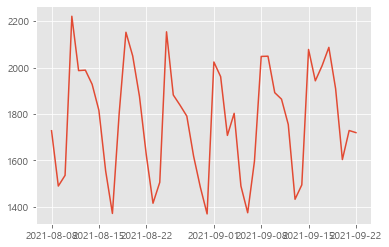

In [10]:
from matplotlib import font_manager

font_family = font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
plt.rc('font', family=font_family)


plt.style.use('ggplot') 

plt.plot(df2.기준일, df2['당일'])
plt.show()


조회 지역 입력:서울


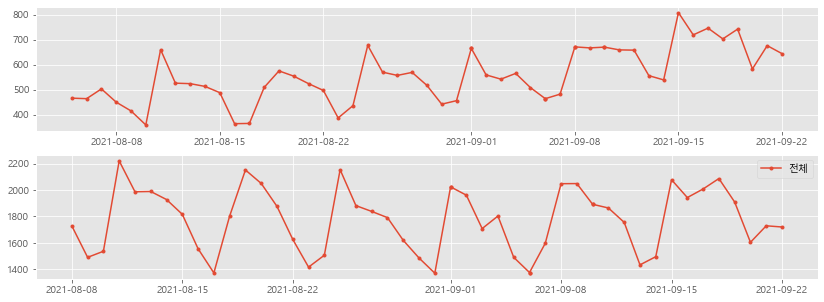

In [11]:
scLoc=input('조회 지역 입력:')

df2=df1[df1['지역명']==scLoc]
df3=df1[df1['지역명']=='합계']

plt.style.use('ggplot') 
plt.figure(figsize=(14, 5))

plt.subplot(211)
plt.plot(df2.기준일, df2['당일'], marker="o", markersize=3, label=scLoc)
plt.subplot(212)
plt.plot(df3.기준일, df3['당일'], marker="o", markersize=3, label='전체')

plt.legend()

plt.show()


조회 지역 입력:제주


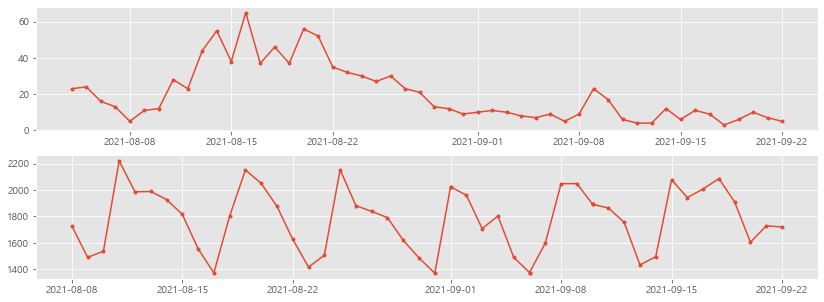

In [12]:
scLoc=input('조회 지역 입력:')

df2=df1[df1['지역명']==scLoc]
df3=df1[df1['지역명']=='합계']

plt.style.use('ggplot') 
plt.figure(figsize=(14, 5))


plt.subplot(211)
plt.plot(df2.기준일, df2['당일'], marker="o", markersize=3, label=scLoc)
plt.subplot(212)
plt.plot(df3.기준일, df3['당일'], marker="o", markersize=3, label='전체')


### [미션] 합계 출력 후 아래쪽에 지역별 그래프  전체 출력

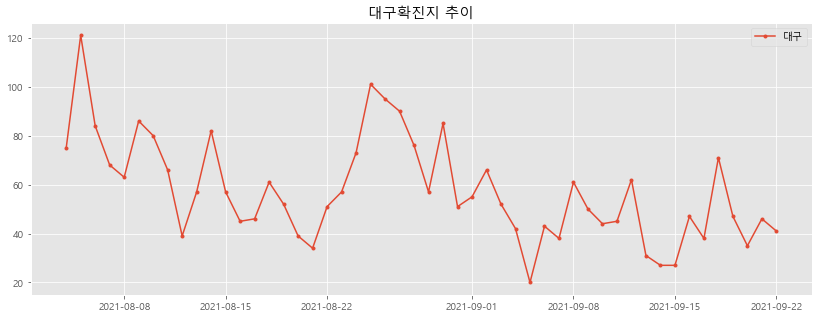

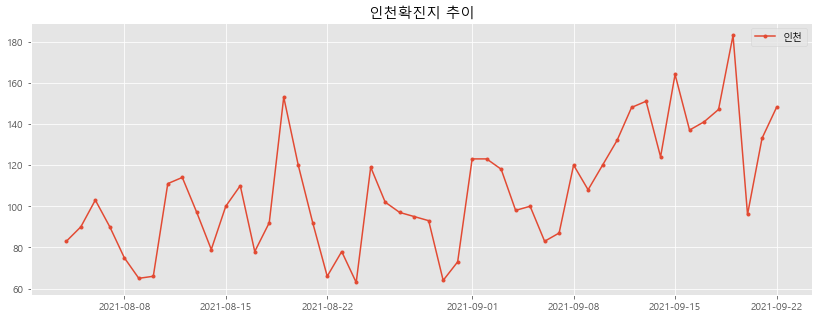

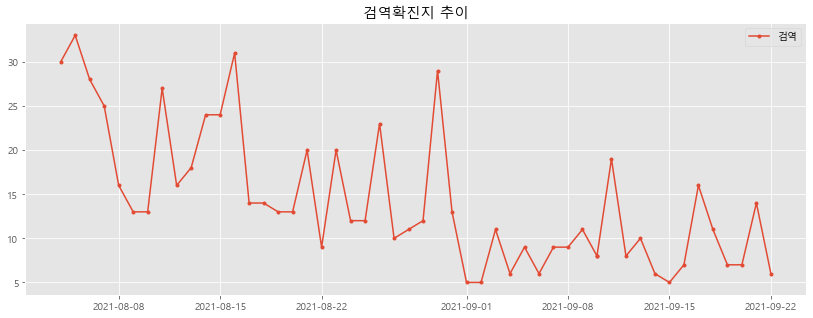

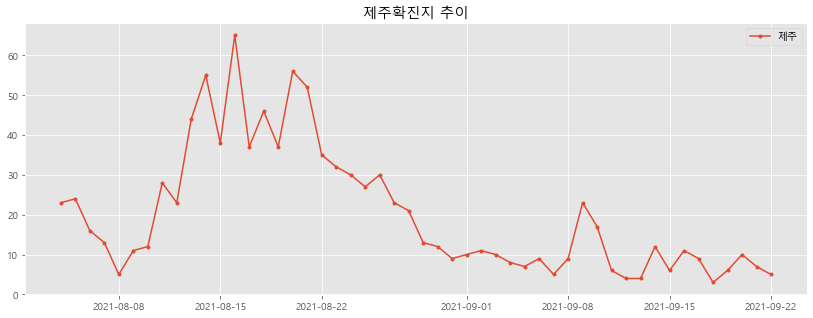

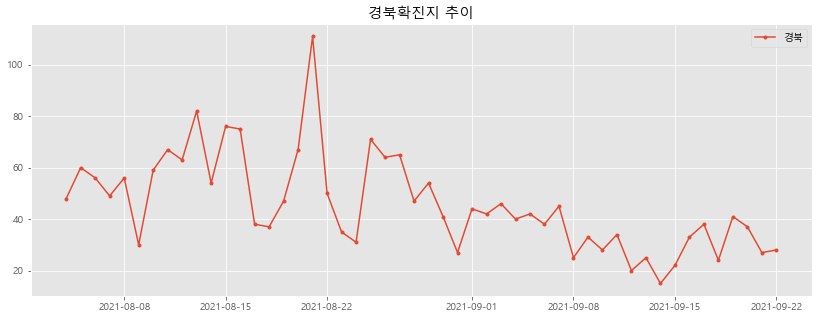

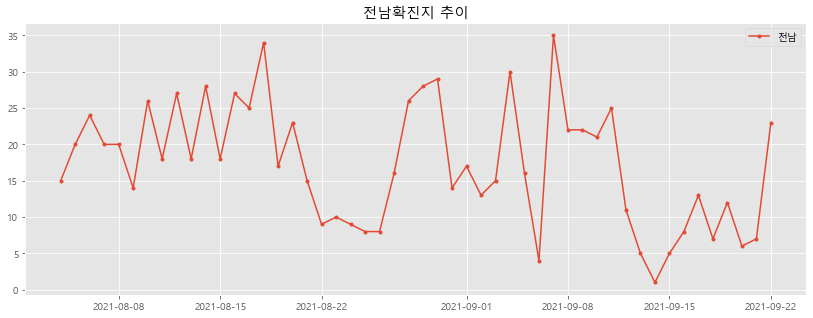

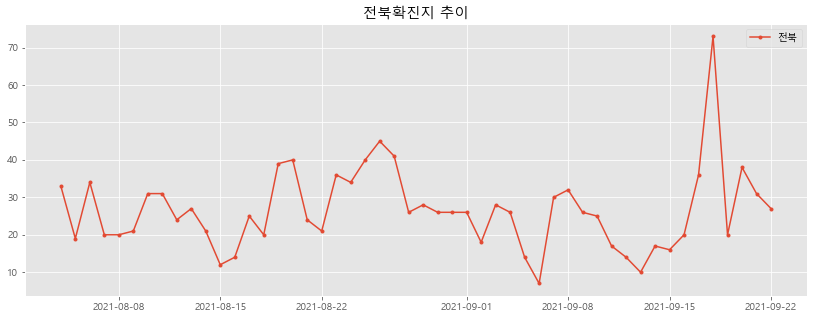

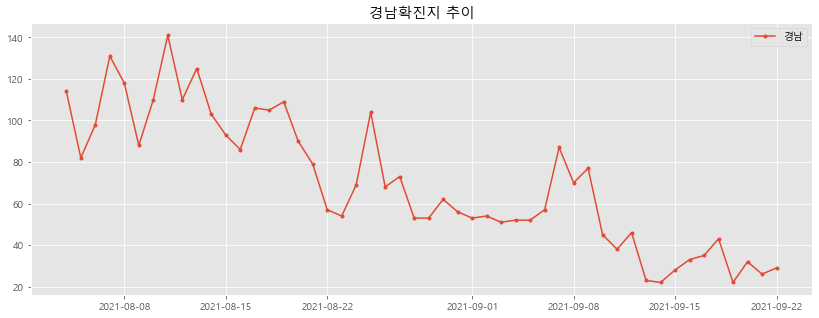

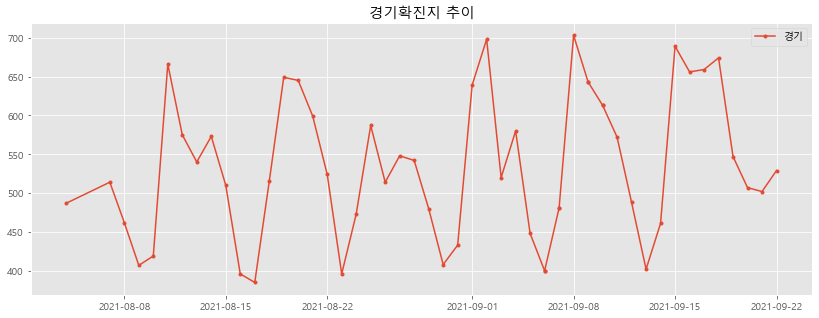

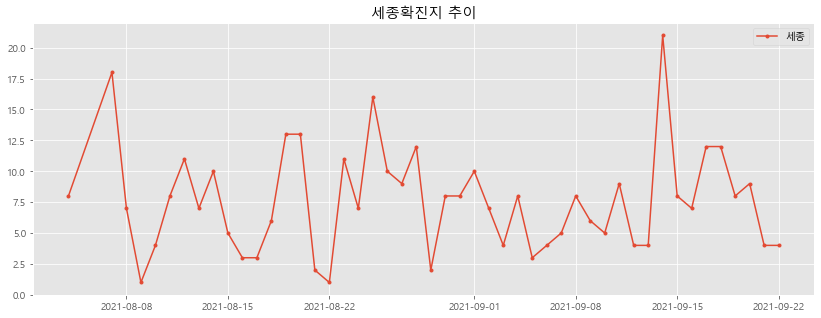

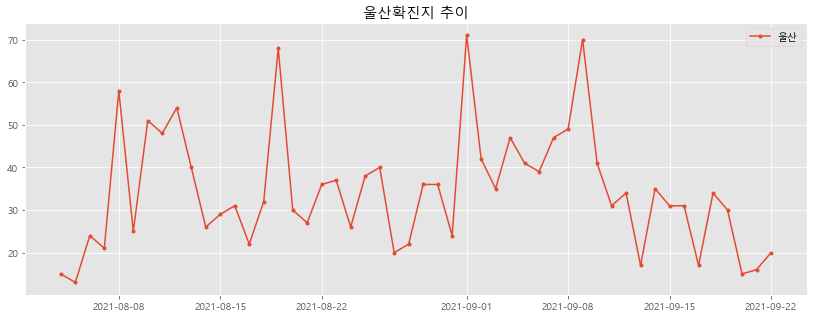

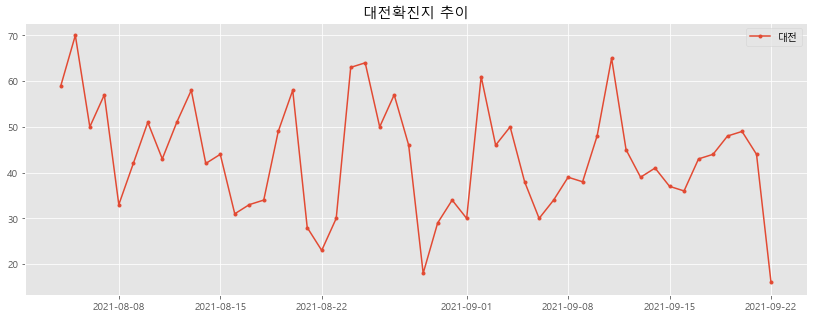

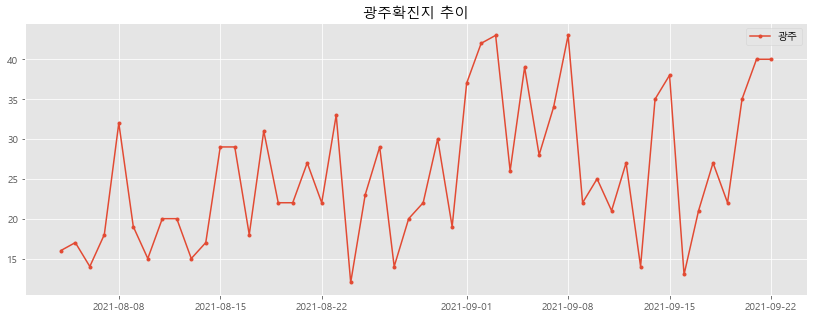

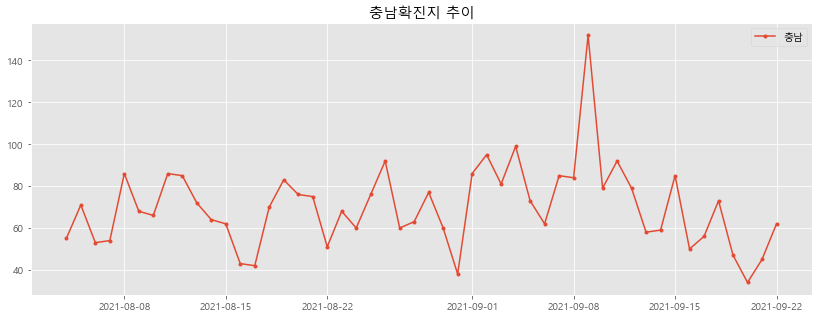

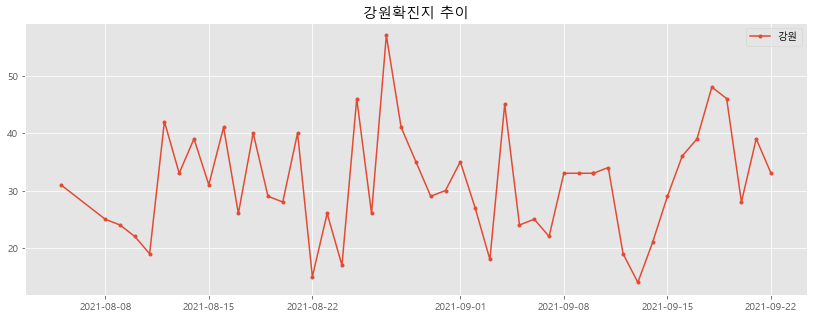

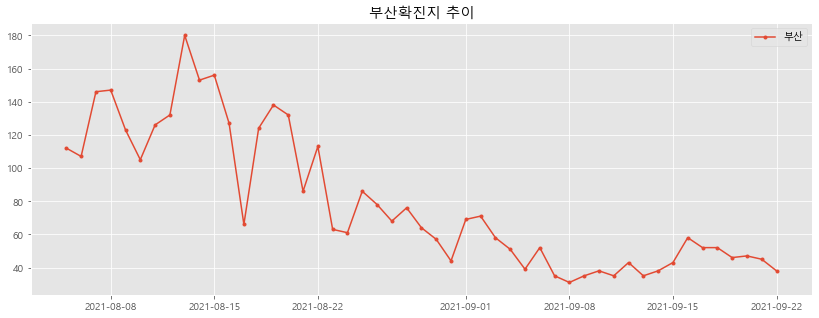

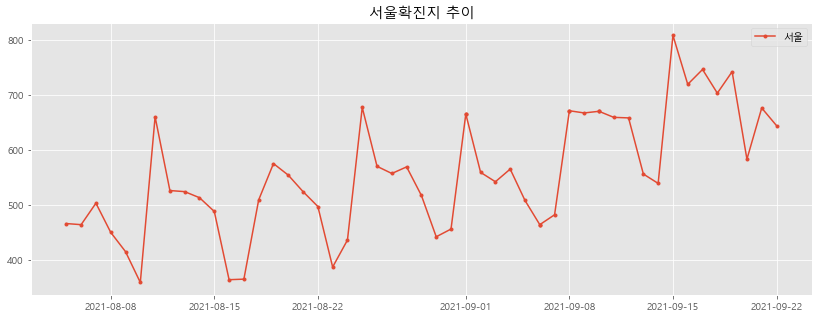

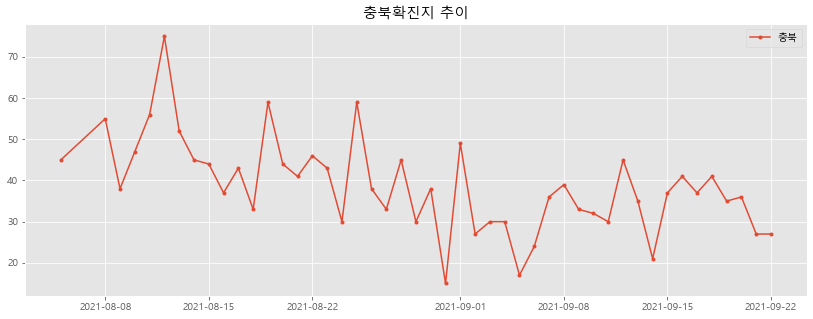

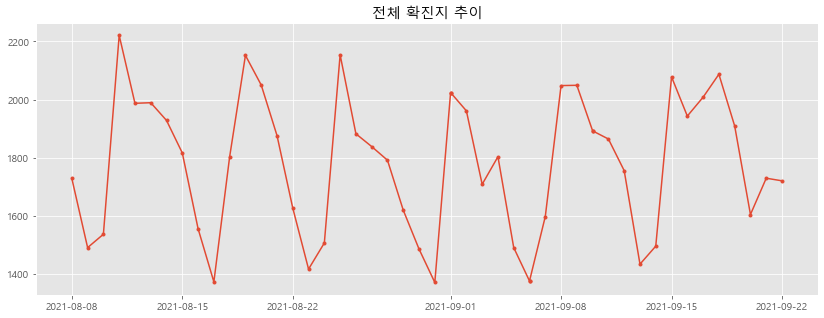

In [13]:
df_name = []
for i in df1['지역명'].unique():
    df_name.append(i)

#df_name

plt.style.use('ggplot') 


for i in df_name:
    df2=df1[df1['지역명']==i]
    if i == '합계':
        
        plt.figure(figsize=(14, 5))
        plt.plot(df2.기준일, df2['당일'], marker="o", markersize=3, label= '전체')
        plt.title('전체 확진지 추이')
    else :
        plt.figure(figsize=(14, 5))
        plt.plot(df2.기준일, df2['당일'], marker="o", markersize=3, label= i)
        plt.title(i +'확진지 추이')
        plt.legend()
        
    plt.show()



In [14]:
# 영역 나누기

# for i in range(len(df_name)):
#     df2=df1[df1['지역명']==df_name[i]]
#     if df_name[i] == '합계':
#         plt.figure(figsize=(10, 5))
#         plt.subplot(len(df_name),1,i+1)
        
#         plt.plot(df2.기준일, df2['당일'], marker="o", markersize=3, label= '전체')
#         plt.legend()
#     else :
#         plt.figure(figsize=(10, 5))
#         plt.subplot(len(df_name),1,i+1)
        
#         plt.plot(df2.기준일, df2['당일'], marker="o", markersize=3, label= df_name[i])
#         plt.legend()
   
#     plt.show()



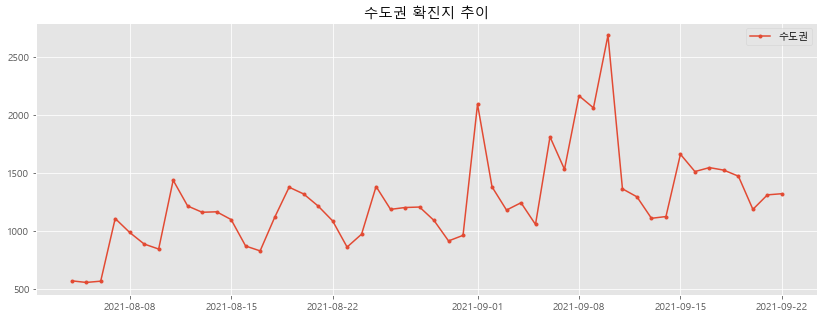

In [14]:
수도권 = ['서울', '경기', '인천']

df3 = pd.DataFrame()
for i in 수도권:
    df2=df1[df1['지역명']==i]
    df3 = pd.concat([df3,df2], ignore_index =True)

df3 = df3.groupby('기준일').sum()
df3 = df3.reset_index()

plt.figure(figsize=(14, 5))
plt.plot(df3.기준일, df3['당일'], marker="o", markersize=3, label= '수도권')
plt.title('수도권 확진지 추이')
plt.legend()
plt.show()

In [ ]:
df3